___



# Метод опорных векторов - Support Vector Machines 


## Подделка вина

Чаще всего вино подделывают, разбавляя его более дешёвыми продуктами (например, соком), а иногда и с помощью опасных химикатов или подсластителей (чтобы добавить цвет или вкус).

Другой тип подделки - продажа более дешёвых вин под более дорогими марками.

<img src="wine.jpg">

## Цели проекта

Компания-дистрибьютор вина недавно столкнулась с подделками. В итоге был проведён аудит различных вин с помощью химического анализа. Компания занимается экспортом очень качественных и дорогих вин, но один из поставщиков попытался передать дешёвое вино под видом более дорогого. Компания-дистрибьютор наняла Вас, чтобы Вы создали модель машинного обучения, которая предскажет низкое качество вина (то есть, "подделку"). Они хотят узнать, возможно ли определить разницу между дешёвыми и дорогими винами.


Источник данных: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**Обшая цель - используя данные ниже, разработать модель машинного обучения, которая будет предсказывать на основе некоторых химических тестов, является ли вино настоящим или поддельным. **

---
---

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("../DATA/wine_fraud.csv")


In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


**Сколько различных значений находится в целевой колонке quality, значения которой мы будем предсказывать?**

In [4]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

**Нарисуем график countplot, отображающий количество для каждой из категорий - Legit и Fraud.**

<Axes: xlabel='quality', ylabel='count'>

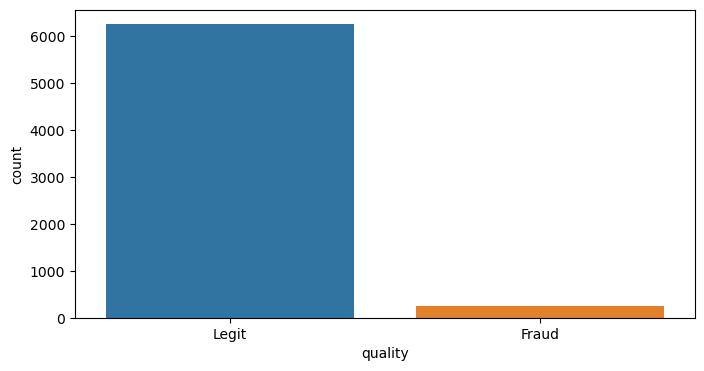

In [5]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['quality'])

**Выясним, есть ли разница в количестве подделок в зависимости от того, красное вино или белое. Нарисуйте график countplot, отображая *тип* вина по оси x, и разбивая значения Fraud и Legit с помощью параметра hue.**

<Axes: xlabel='type', ylabel='count'>

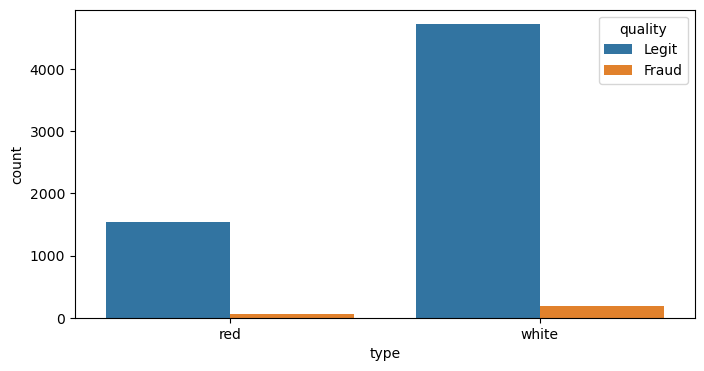

In [6]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['type'], hue=df['quality'])

**Какой процент красных вин является подделкой? Какой процент белых вин является подделкой?**

In [7]:
fake_red_wine = df[df["type"]=='red']

In [8]:
fake_white_wine = df[df["type"]=='white']

In [9]:
print("Percentage of fraud in Red Wines:")
print(100* (len(fake_red_wine[fake_red_wine['quality']=='Fraud'])/len(fake_red_wine)))

Percentage of fraud in Red Wines:
3.9399624765478425


In [10]:
print("Percentage of fraud in White Wines:")
print(100* (len(fake_white_wine [fake_white_wine ['quality']=='Fraud'])/len(fake_white_wine)))

Percentage of fraud in White Wines:
3.7362188648427925


**Вычислим корреляцию между различными признаками и колонкой "quality". Чтобы сделать это,можем использовать значения 0 и 1 вместо текстовых значений Legit и Fraud.**

In [11]:
df['Fraud'] = df['quality'].map({'Legit': 0, 'Fraud': 1})


In [12]:
df.corr()['Fraud']

/var/folders/wx/tzjlvjqj6vngt3cmdsx8z0z00000gn/T/ipykernel_44753/1400609001.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Fraud']


fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

**Нарисуем график bar plot, отобразив значения корреляции для поддельных вин.**

/var/folders/wx/tzjlvjqj6vngt3cmdsx8z0z00000gn/T/ipykernel_44753/146791367.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=df.corr()['Fraud'][:-1].sort_values().plot(kind='bar')


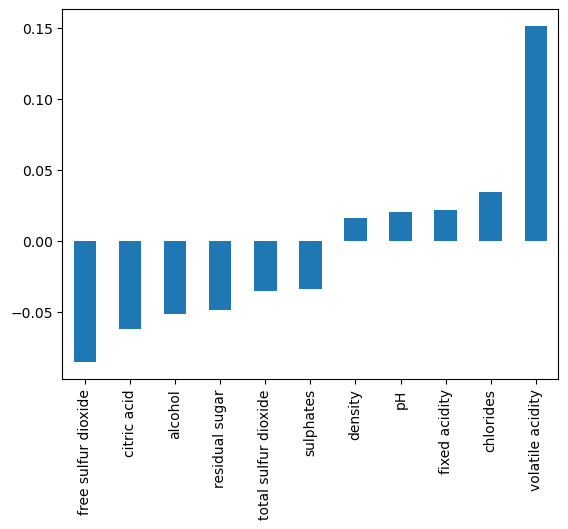

In [13]:
data=df.corr()['Fraud'][:-1].sort_values().plot(kind='bar')


**Нарисуем график clustermap с помощью seaborn, чтобы исследовать связи между переменными.**

/var/folders/wx/tzjlvjqj6vngt3cmdsx8z0z00000gn/T/ipykernel_44753/246764947.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data=df.corr(), cmap='cividis')


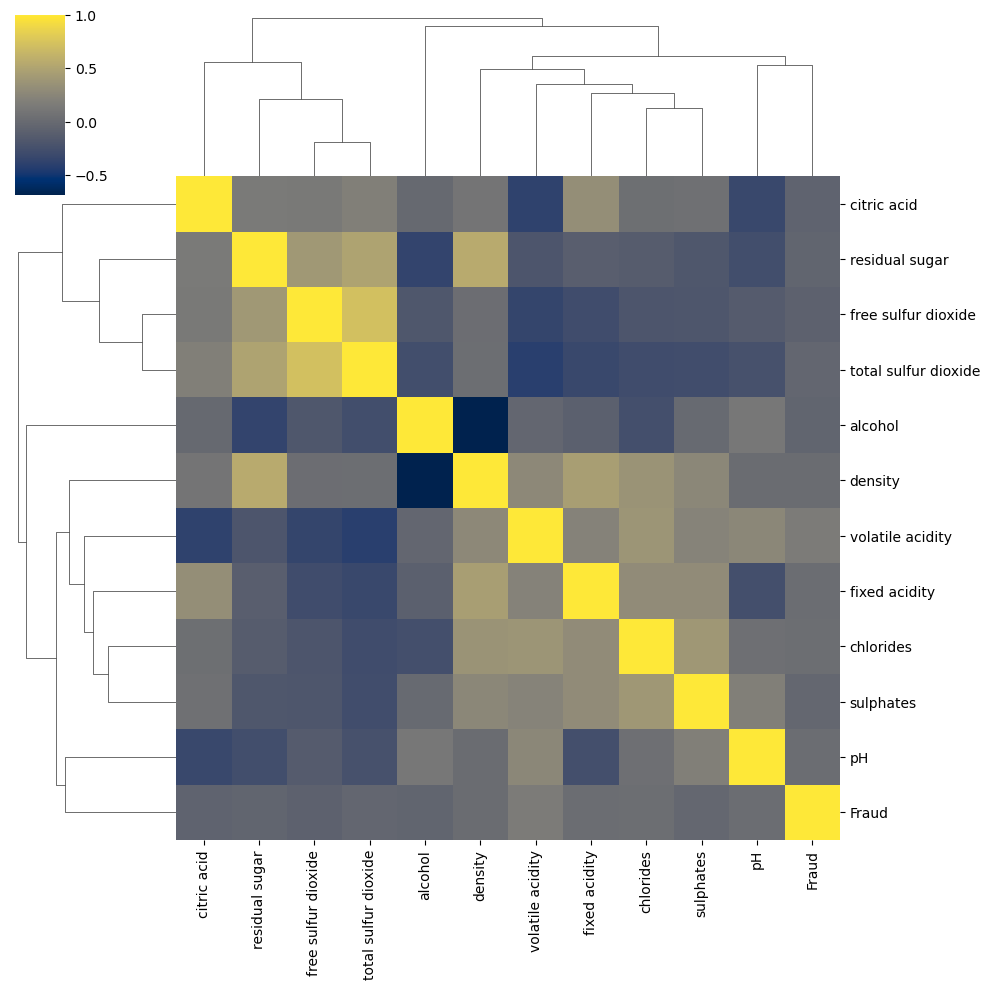

In [14]:
sns.clustermap(data=df.corr(), cmap='cividis')

----
## Модель машинного обучения

**Сконвертируем категориальную колонку "type" из текстовых значений "red" и "white" в dummy-переменные:**

In [15]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)


In [16]:
df = df.drop('Fraud',axis=1)

**Разделим данные на признаки X и целевую переменную y (колонка "quality")**

In [17]:
X = df.drop('quality', axis=1)
y = df['quality']

**Разобьем данные на обучающий и тестовый набор данных, в отношении 90% и 10%.**

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Смасштабируем данные в наборах X train и X test.**

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Создадим экземпляр классификатора Support Vector Machine.Поскольку мы знаем, что классы несбалансированы, для решения этой проблемы мы можем автоматически подобрать веса обратно пропорционально тому, как часто встречаются классы во входных переменных, используя параметр в вызове метода SVC().**

In [24]:
from sklearn.svm import SVC

In [30]:
base_model = SVC(class_weight='balanced')

**С помощью GridSearchCV выполните поиск по сетке значений параметров C и gamma.**

In [27]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
              'gamma':['scale','auto']}



In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
grid = GridSearchCV(base_model,param_grid=param_grid)

In [32]:
grid.fit(X_train_scaled ,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [33]:
grid.best_params_

{'C': 0.001, 'gamma': 'scale'}

**Отобразить матрицу "confusion matrix" и отчёт "classification report" для Вашей модели.**

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
grid_pred = grid.predict(X_test_scaled)

In [37]:
confusion_matrix(y_test,grid_pred)

array([[  0,  27],
       [  0, 623]])

In [38]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

       Fraud       0.00      0.00      0.00        27
       Legit       0.96      1.00      0.98       623

    accuracy                           0.96       650
   macro avg       0.48      0.50      0.49       650
weighted avg       0.92      0.96      0.94       650



/Users/redbull1122/anaconda3/envs/Scikit-LearnEV/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/redbull1122/anaconda3/envs/Scikit-LearnEV/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/redbull1122/anaconda3/envs/Scikit-LearnEV/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa